In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Decision Making Under Risk**
1. This is decision making when there are several 
possible states of nature, and the probabilities 
associated with each possible state are known.
2. The most popular method is to choose the 
alternative with the highest expected monetary 
value (EMV).


In [92]:
#EVM is just an Expected value
problailty = [0.2, 0.5, 0.30]
table = {
    "Alternateves" : ["Small shop", "Meduim Shop", "No shop", "problailty"],
    "Good Market" : [75000, 100000, 0, problailty[0]],
    "Average Market" : [25000, 35000, 0, problailty[1]],
    "Bad Market": [-40000, -60000, 0, problailty[2]]
}
df = pd.DataFrame(table)
display(df)

,Alternateves,Good Market,Average Market,Bad Market
0,Small shop,75000.0,25000.0,-40000.0
1,Meduim Shop,100000.0,35000.0,-60000.0
2,No shop,0.0,0.0,0.0
3,problailty,0.2,0.5,0.3


In [93]:
table["Alternateves"]

['Small shop', 'Meduim Shop', 'No shop', 'problailty']

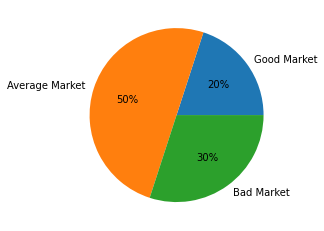

In [94]:
plt.pie(problailty, labels=['Good Market', 'Average Market', 'Bad Market'], autopct='%1.0f%%');


In [95]:
market_conditions = [[df["Good Market"][i], df["Average Market"][i], df["Bad Market"][i]] for i in range(len(df)-1) ]
market_conditions

[[75000.0, 25000.0, -40000.0], [100000.0, 35000.0, -60000.0], [0.0, 0.0, 0.0]]

In [96]:
mixed = []
for i in range(len(market_conditions)):
    mixed.append(list(zip(market_conditions[i], problailty)))
mixed


[[(75000.0, 0.2), (25000.0, 0.5), (-40000.0, 0.3)],
 [(100000.0, 0.2), (35000.0, 0.5), (-60000.0, 0.3)],
 [(0.0, 0.2), (0.0, 0.5), (0.0, 0.3)]]

In [97]:
mixed[1][0]

(100000.0, 0.2)

In [98]:
def Evm(mixed):
    Sum = []
    for i in mixed:
        sume = 0
        for j in i:
            
            sume += j[0]*j[1]
        Sum.append(sume)
    return Sum

EVM = Evm(mixed)
           

In [99]:
EVM

[15500.0, 19500.0, 0.0]

In [100]:
EVM.append(np.NAN)
df["EVM"] = EVM
display(df)

,Alternateves,Good Market,Average Market,Bad Market,EVM
0,Small shop,75000.0,25000.0,-40000.0,15500.0
1,Meduim Shop,100000.0,35000.0,-60000.0,19500.0
2,No shop,0.0,0.0,0.0,0.0
3,problailty,0.2,0.5,0.3,NaN


In [101]:
#the decision to take is to build a meduim shop  
df.loc[df["EVM"] == df["EVM"].max()]

,Alternateves,Good Market,Average Market,Bad Market,EVM
1,Meduim Shop,100000.0,35000.0,-60000.0,19500.0


**Expected Opportunity Loss**
An alternative approach to maximizing EMV is to minimize expected opportunity loss (EOL).
First, an opportunity loss table is constructed. Then the EOL is computed for each alternative by
multiplying the opportunity loss by the probability and adding these together.

EOL is the cost of not picking the best solution.

EOL will always result in the same decision as the maximum EMV

regret table is needed first => max profit in a column - every column element

In [104]:
goodMarketMax = df["Good Market"].max()
averageMarketMax = df["Average Market"].max()
badMarketMax = df["Bad Market"].max()
goodMarketMax, averageMarketMax, badMarketMax


(100000.0, 35000.0, 0.3)

In [106]:
df["Regret for Good Market"] = goodMarketMax - df["Good Market"][:3]
df["Regret for the Average Market"] = averageMarketMax - df["Average Market"][:3]
df["Regret for the Bad Market"] = badMarketMax - df["Bad Market"][:3]

df

,Alternateves,Good Market,Average Market,Bad Market,EVM,Regret for Good Market,Regret for the Average Market,Regret for the Bad Market
0,Small shop,75000.0,25000.0,-40000.0,15500.0,25000.0,10000.0,40000.3
1,Meduim Shop,100000.0,35000.0,-60000.0,19500.0,0.0,0.0,60000.3
2,No shop,0.0,0.0,0.0,0.0,100000.0,35000.0,0.3
3,problailty,0.2,0.5,0.3,NaN,NaN,NaN,NaN


In [128]:
Regret = df.iloc[:3, 5::]


Regret["Max"] = [max(Regret["Regret for Good Market"][i],
                 Regret["Regret for the Average Market"][i], 
                 Regret["Regret for the Bad Market"][i]) 
                 for i in range(len(Regret))
                 
                 ]
display(Regret)

,Regret for Good Market,Regret for the Average Market,Regret for the Bad Market,Max
0,25000.0,10000.0,40000.3,40000.3
1,0.0,0.0,60000.3,60000.3
2,100000.0,35000.0,0.3,100000.0


In [141]:
Columns = Regret.columns[:-1].to_list()
Columns


['Regret for Good Market',
 'Regret for the Average Market',
 'Regret for the Bad Market']

In [158]:
#EOL 
# Expected value = ∑ (Regret)* probapilty(Regret)
def EOL(problailty, Regret):
    Eol = []
    summ = []
  
    for i in range(len(Regret)):
        Eol.append([Regret[Columns[i]][j]*problailty[i] for j in range(len(Regret))])
    print("EOL =>", Eol)
    for j in range(len(Eol[0])):
        sume = 0
        for i in range(len(Eol)):
           sume += Eol[i][j]
        summ.append(sume)
    
    
    
    return summ
EOL = EOL(problailty=problailty, Regret=Regret)
Regret["EOL"] = EOL
display(Regret)

EOL => [[5000.0, 0.0, 20000.0], [5000.0, 0.0, 17500.0], [12000.09, 18000.09, 0.09]]


,Regret for Good Market,Regret for the Average Market,Regret for the Bad Market,Max,EOL
0,25000.0,10000.0,40000.3,40000.3,22000.09
1,0.0,0.0,60000.3,60000.3,18000.09
2,100000.0,35000.0,0.3,100000.0,37500.09
